### Module 5: Frequent Itemsets

Suppose we have transactions that satisfy the following assumptions:
- s, the support threshold, is 10,000.
- There are one million items, which are represented by the integers 0,1,...,999999.
- There are N frequent items, that is, items that occur 10,000 times or more.
- There are one million pairs that occur 10,000 times or more.
- There are 2M pairs that occur exactly once. M of these pairs consist of two frequent items, the other M each have at least one nonfrequent item.
- No other pairs occur at all.
- Integers are always represented by 4 bytes.

Suppose we run the a-priori algorithm to find frequent pairs and can choose on the second pass between the triangular-matrix method for counting candidate pairs (a triangular array count[i][j] that holds an integer count for each pair of items (i, j) where i < j) and a hash table of item-item-count triples. Neglect in the first case the space needed to translate between original item numbers and numbers for the frequent items, and in the second case neglect the space needed for the hash table. Assume that item numbers and counts are always 4-byte integers.

As a function of N and M, what is the minimum number of bytes of main memory needed to execute the a-priori algorithm on this data?

In [1]:
support_threshold = 10**4
num_items = 10**6
num_freq_pairs = 10**6

variable_choices = [( 20 * 10**3,  80 * 10**6),
                    (100 * 10**3,  40 * 10**6),
                    ( 50 * 10**3, 200 * 10**6),
                    ( 30 * 10**3, 100 * 10**6)]

def n_choose_2(N):
    return N * (N-1) / 2

for N, M in variable_choices:
    # first pass only stores the item counts
    # second pass stores the frequent items and
    # the counts of pairs of frequent items (candidate pairs)
    t_matrix_memory = 4 * n_choose_2(N)
    triples_memory = 12 * M
    min_memory = 4 * N + min(t_matrix_memory, triples_memory)
    print('N: {:,}, M: {:,}, Memory: {:,}'.format(N, M, min_memory))

N: 20,000, M: 80,000,000, Memory: 800,040,000.0
N: 100,000, M: 40,000,000, Memory: 480,400,000
N: 50,000, M: 200,000,000, Memory: 2,400,200,000
N: 30,000, M: 100,000,000, Memory: 1,200,120,000


Below is a table representing eight transactions and five items: Beer, Coke, Pepsi, Milk, and Juice. The items are represented by their first letters; e.g., "M" = milk. An "x" indicates membership of the item in the transaction.

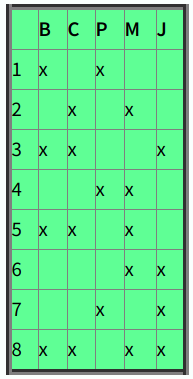

In [2]:
from IPython.display import Image
Image(filename='transactions.png')

Compute the support for each of the 10 pairs of items. If the support threshold is 2, which of the pairs are frequent itemsets?

In [3]:
from collections import defaultdict

transactions = [['B', 'P'],
                ['C', 'M'],
                ['B', 'C', 'J'],
                ['P', 'M'],
                ['B', 'C', 'M'],
                ['M', 'J'],
                ['P', 'J'],
                ['B', 'C', 'M', 'J']]

pair_counts = defaultdict(int)

def pairs(items):
    combos = []
    for i in range(0, len(items)):
        for j in range(i+1, len(items)):
            combos.append((items[i], items[j]))
    return combos

for transaction in transactions:
    for pair in pairs(transaction):
        pair_counts[pair] += 1
        
for pair, count in pair_counts.items():
    if count >= 2:
        print(pair, count)

('C', 'M') 3
('B', 'C') 3
('B', 'J') 2
('C', 'J') 2
('B', 'M') 2
('M', 'J') 2


Suppose we perform the PCY algorithm to find frequent pairs, with market-basket data meeting the following specifications:

- s, the support threshold, is 10,000.
- There are one million items, which are represented by the integers 0,1,...,999999.
- There are 250,000 frequent items, that is, items that occur 10,000 times or more.
- There are one million pairs that occur 10,000 times or more.
- There are P pairs that occur exactly once and consist of 2 frequent items.
- No other pairs occur at all.
- Integers are always represented by 4 bytes.
- When we hash pairs, they distribute among buckets randomly, but as evenly as possible; i.e., you may assume that each bucket gets exactly its fair share of the P pairs that occur once.

Suppose there are S bytes of main memory. In order to run the PCY algorithm successfully, the number of buckets must be sufficiently large that most buckets are not frequent. In addition, on the second pass, there must be enough room to count all the candidate pairs. As a function of S, what is the largest value of P for which we can successfully run the PCY algorithm on this data?

In [20]:
support_threshold = 10**4
num_items = 10**6
num_freq_items = 250 * 10**3
num_freq_pairs = 10**6
bucket_bytes = 4

variable_sets = [(      10**9,  35 * 10**9),
                 (      10**9,  10 * 10**9),
                 (0.5 * 10**9,   5 * 10**9),
                 (0.5 * 10**9, 3.2 * 10**9)]

for S, P in variable_sets:
    # first pass
    t1_matrix_memory = 4 * num_items
    triples1_memory = 12 * num_freq_items
    item_counts_memory = min(t1_matrix_memory, triples1_memory)
    remaining_memory = S - item_counts_memory
    num_buckets = remaining_memory / bucket_bytes
    avg_nonfrequent_bucket_count = P / num_buckets
    print('First pass: Support Threshold: {:,}, Avg Count: {:,}'.format(
        support_threshold,
        int(avg_nonfrequent_bucket_count),
    ))
    # second pass
    freq_items_memory = 4 * num_freq_items
    bitmap_memory = (1 / 8) * num_buckets
    # assume each frequent pair hashes to a different bucket
    # each of this buckets also gets its fair share of the P pairs that occur once
    num_candidate_pairs = num_freq_pairs + num_freq_pairs * avg_nonfrequent_bucket_count
    # PCY algorithm requires a hash table to store candidate pairs
    triples2_memory = 12 * num_candidate_pairs
    second_pass_memory = sum([
        freq_items_memory,
        bitmap_memory,
        triples2_memory,
    ])
    print('Second pass: Memory: {:,}, Needs: {:,}\n'.format(int(S), int(second_pass_memory)))

First pass: Support Threshold: 10,000, Avg Count: 140
Second pass: Memory: 1,000,000,000, Needs: 1,729,211,415

First pass: Support Threshold: 10,000, Avg Count: 40
Second pass: Memory: 1,000,000,000, Needs: 525,600,582

First pass: Support Threshold: 10,000, Avg Count: 40
Second pass: Memory: 500,000,000, Needs: 511,428,634

First pass: Support Threshold: 10,000, Avg Count: 25
Second pass: Memory: 500,000,000, Needs: 337,585,575



During a run of Toivonen's Algorithm with set of items {A,B,C,D,E,F,G,H} a sample is found to have the following maximal frequent itemsets: {A,B}, {A,C}, {A,D}, {B,C}, {E}, {F}. Compute the negative border.

In [5]:
from itertools import combinations

items = [letter for letter in 'ABCDEFGH']
max_freq_itemsets = [['A', 'B'],
                     ['A', 'C'],
                     ['A', 'D'],
                     ['B', 'C'],
                     ['E'],
                     ['F']]

def all_freq_itemsets(max_freq_itemsets):
    freq_itemsets = max_freq_itemsets 
    for itemset in max_freq_itemsets:
        for i in range(1, len(itemset)):
            combos = combinations(itemset, i)
            for combo in combos:
                if list(combo) not in freq_itemsets:
                    freq_itemsets.append(list(combo))
    return freq_itemsets

def in_negative_border(candidate, freq_itemsets):
    n_minus_1_subsets = combinations(candidate, len(candidate) - 1)
    if candidate in freq_itemsets:
        return False
    for subset in n_minus_1_subsets:
        if list(subset) not in freq_itemsets:
            return False
    return True

freq_itemsets = all_freq_itemsets(max_freq_itemsets)

for itemset in max_freq_itemsets:
    last_item = sorted(itemset)[-1]
    for idx, item in enumerate(items):
        if idx > items.index(last_item) and item not in itemset:
            candidate = sorted(itemset + [item])
            if in_negative_border(candidate, freq_itemsets):
                print(candidate)

['A', 'B', 'C']
['E', 'F']
['A', 'E']
['A', 'F']
['B', 'D']
['B', 'E']
['B', 'F']
['C', 'D']
['C', 'E']
['C', 'F']
['D', 'E']
['D', 'F']
